In [1]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

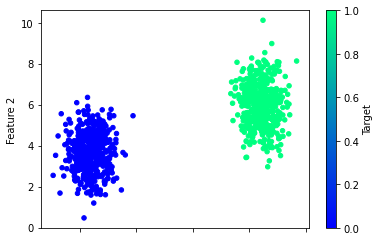

In [2]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [5]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [6]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [8]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [9]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

2022-09-01 13:08:41.407710: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-01 13:08:41.410172: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


In [10]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [11]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [12]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [13]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Train on 750 samples
Epoch 1/100
750/750 [==============================] - 1s 783us/sample - loss: 1.2720 - accuracy: 0.0227
Epoch 2/100
750/750 [==============================] - 0s 34us/sample - loss: 1.2275 - accuracy: 0.0040
Epoch 3/100
750/750 [==============================] - 0s 35us/sample - loss: 1.1866 - accuracy: 0.0040
Epoch 4/100
750/750 [==============================] - 0s 33us/sample - loss: 1.1485 - accuracy: 0.0040
Epoch 5/100
750/750 [==============================] - 0s 33us/sample - loss: 1.1131 - accuracy: 0.0040
Epoch 6/100
750/750 [==============================] - 0s 34us/sample - loss: 1.0808 - accuracy: 0.0040
Epoch 7/100
750/750 [==============================] - 0s 32us/sample - loss: 1.0514 - accuracy: 0.0053
Epoch 8/100
750/750 [==============================] - 0s 34us/sample - loss: 1.0240 - accuracy: 0.0053
Epoch 9/100
750/750 [==============================] - 0s 34us/sample - loss: 0.9986 - accuracy: 0.0053
Epoch 10/100
750/750 [====================

750/750 [==============================] - 0s 33us/sample - loss: 0.4840 - accuracy: 0.9933
Epoch 79/100
750/750 [==============================] - 0s 34us/sample - loss: 0.4728 - accuracy: 0.9947
Epoch 80/100
750/750 [==============================] - 0s 31us/sample - loss: 0.4617 - accuracy: 0.9947
Epoch 81/100
750/750 [==============================] - 0s 32us/sample - loss: 0.4505 - accuracy: 0.9947
Epoch 82/100
750/750 [==============================] - 0s 32us/sample - loss: 0.4395 - accuracy: 0.9947
Epoch 83/100
750/750 [==============================] - 0s 32us/sample - loss: 0.4286 - accuracy: 0.9947
Epoch 84/100
750/750 [==============================] - 0s 31us/sample - loss: 0.4177 - accuracy: 0.9947
Epoch 85/100
750/750 [==============================] - 0s 32us/sample - loss: 0.4071 - accuracy: 0.9947
Epoch 86/100
750/750 [==============================] - 0s 31us/sample - loss: 0.3966 - accuracy: 0.9947
Epoch 87/100
750/750 [==============================] - 0s 32us/samp

<AxesSubplot:>

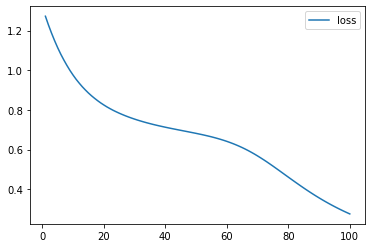

In [14]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

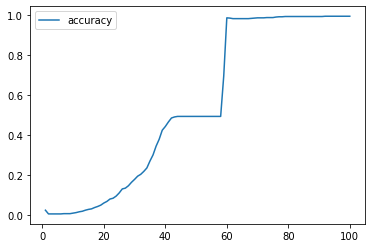

In [15]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [16]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

250/1 - 0s - loss: 0.2728 - accuracy: 1.0000
Loss: 0.26231960344314575, Accuracy: 1.0


In [17]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
(nn_model.predict(new_X_scaled) > 0.5).astype("int32")

array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]], dtype=int32)

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

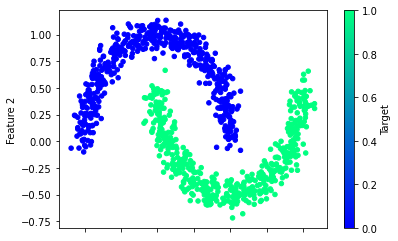

In [18]:
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")

In [19]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)


In [20]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Train on 750 samples
Epoch 1/100
750/750 [==============================] - 0s 77us/sample - loss: 0.8340 - accuracy: 0.3893
Epoch 2/100
750/750 [==============================] - 0s 34us/sample - loss: 0.8052 - accuracy: 0.4040
Epoch 3/100
750/750 [==============================] - 0s 34us/sample - loss: 0.7790 - accuracy: 0.4227
Epoch 4/100
750/750 [==============================] - 0s 34us/sample - loss: 0.7571 - accuracy: 0.4440
Epoch 5/100
750/750 [==============================] - 0s 33us/sample - loss: 0.7398 - accuracy: 0.4493
Epoch 6/100
750/750 [==============================] - 0s 35us/sample - loss: 0.7246 - accuracy: 0.4680
Epoch 7/100
750/750 [==============================] - 0s 34us/sample - loss: 0.7123 - accuracy: 0.4853
Epoch 8/100
750/750 [==============================] - 0s 35us/sample - loss: 0.7016 - accuracy: 0.5040
Epoch 9/100
750/750 [==============================] - 0s 35us/sample - loss: 0.6920 - accuracy: 0.5187
Epoch 10/100
750/750 [=====================

750/750 [==============================] - 0s 34us/sample - loss: 0.4701 - accuracy: 0.7627
Epoch 79/100
750/750 [==============================] - 0s 33us/sample - loss: 0.4678 - accuracy: 0.7627
Epoch 80/100
750/750 [==============================] - 0s 33us/sample - loss: 0.4655 - accuracy: 0.7680
Epoch 81/100
750/750 [==============================] - 0s 32us/sample - loss: 0.4632 - accuracy: 0.7680
Epoch 82/100
750/750 [==============================] - 0s 32us/sample - loss: 0.4609 - accuracy: 0.7693
Epoch 83/100
750/750 [==============================] - 0s 31us/sample - loss: 0.4586 - accuracy: 0.7733
Epoch 84/100
750/750 [==============================] - 0s 31us/sample - loss: 0.4562 - accuracy: 0.7773
Epoch 85/100
750/750 [==============================] - 0s 32us/sample - loss: 0.4539 - accuracy: 0.7773
Epoch 86/100
750/750 [==============================] - 0s 31us/sample - loss: 0.4517 - accuracy: 0.7787
Epoch 87/100
750/750 [==============================] - 0s 32us/samp

<AxesSubplot:>

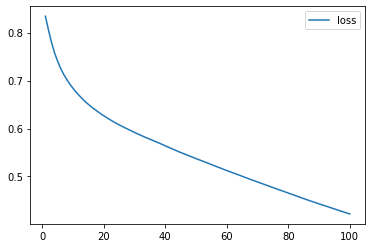

In [21]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

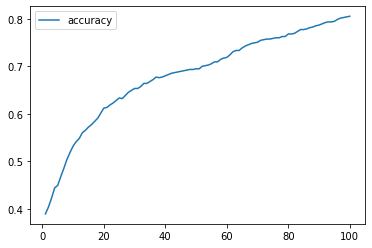

In [22]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [24]:
# Generate our new Sequential model
new_model = tf.keras.models.Sequential()

In [25]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [26]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Train on 750 samples
Epoch 1/100
750/750 [==============================] - 1s 799us/sample - loss: 0.7340 - accuracy: 0.4693
Epoch 2/100
750/750 [==============================] - 0s 34us/sample - loss: 0.6924 - accuracy: 0.4653
Epoch 3/100
750/750 [==============================] - 0s 35us/sample - loss: 0.6544 - accuracy: 0.4920
Epoch 4/100
750/750 [==============================] - 0s 33us/sample - loss: 0.6187 - accuracy: 0.5760
Epoch 5/100
750/750 [==============================] - 0s 33us/sample - loss: 0.5857 - accuracy: 0.6853
Epoch 6/100
750/750 [==============================] - 0s 33us/sample - loss: 0.5543 - accuracy: 0.7640
Epoch 7/100
750/750 [==============================] - 0s 34us/sample - loss: 0.5247 - accuracy: 0.8053
Epoch 8/100
750/750 [==============================] - 0s 34us/sample - loss: 0.4979 - accuracy: 0.8253
Epoch 9/100
750/750 [==============================] - 0s 34us/sample - loss: 0.4727 - accuracy: 0.8373
Epoch 10/100
750/750 [====================

750/750 [==============================] - 0s 48us/sample - loss: 0.2198 - accuracy: 0.9013
Epoch 79/100
750/750 [==============================] - 0s 36us/sample - loss: 0.2192 - accuracy: 0.9013
Epoch 80/100
750/750 [==============================] - 0s 34us/sample - loss: 0.2187 - accuracy: 0.9013
Epoch 81/100
750/750 [==============================] - 0s 33us/sample - loss: 0.2181 - accuracy: 0.9027
Epoch 82/100
750/750 [==============================] - 0s 35us/sample - loss: 0.2178 - accuracy: 0.9013
Epoch 83/100
750/750 [==============================] - 0s 34us/sample - loss: 0.2171 - accuracy: 0.9000
Epoch 84/100
750/750 [==============================] - 0s 36us/sample - loss: 0.2165 - accuracy: 0.9013
Epoch 85/100
750/750 [==============================] - 0s 33us/sample - loss: 0.2160 - accuracy: 0.9013
Epoch 86/100
750/750 [==============================] - 0s 33us/sample - loss: 0.2156 - accuracy: 0.9013
Epoch 87/100
750/750 [==============================] - 0s 32us/samp